In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from tiger.io import read_image, write_image
import torch
from torch.utils.data import DataLoader
sys.path.append('..')
from load_data import load_masks, Dataset, DatasetMask, split_train_val_test
from unet import UNet
from config import *

In [2]:
masks, scores = load_masks(verse2019_dir, cases=5)

Loading masks from /mnt/netcache/bodyct/experiments/vertebra_fracture_detection_t9560/datasets/verse2019/masks_bodies...


  0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
# make train/val split
train_set, val_set, test_set = split_train_val_test(masks, scores, patch_size)

Available cases: 5 
train: 4, val: 0, test: 1
Extracting patches...


  0%|          | 0/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

train: 16, val: 0, test: 1


In [4]:
# initialize data loaders
train_loader = DataLoader(train_set, batch_size=1, shuffle=False)
val_loader = DataLoader(val_set, batch_size=1, shuffle=False)

/usr/local/lib/python3.8/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


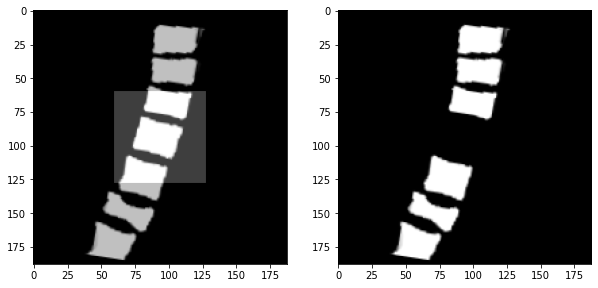

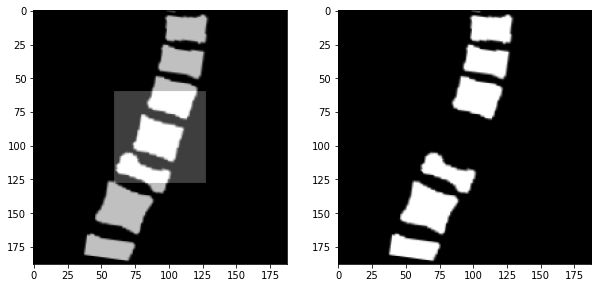

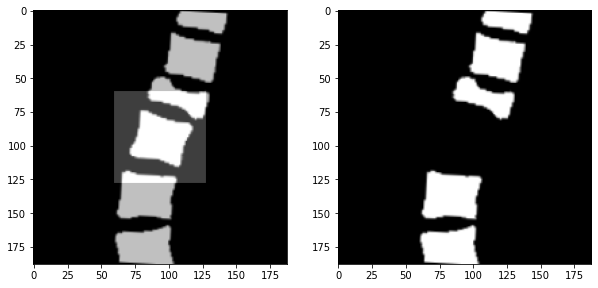

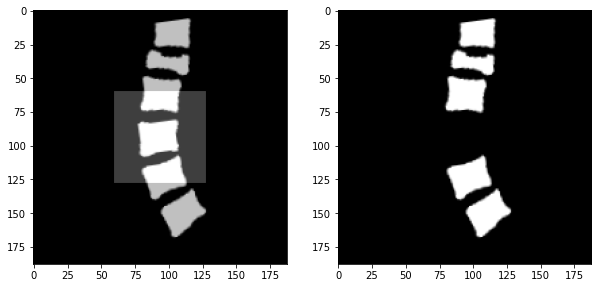

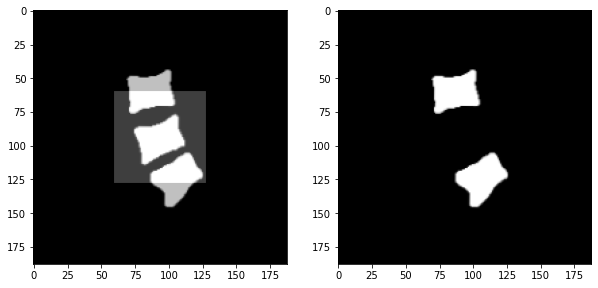

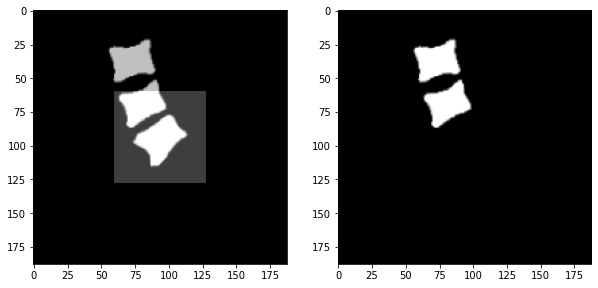

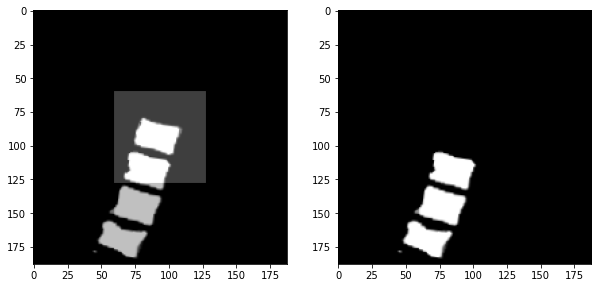

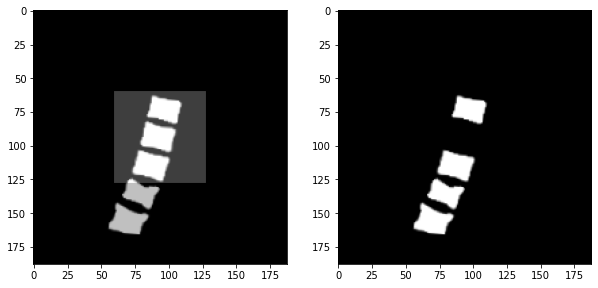

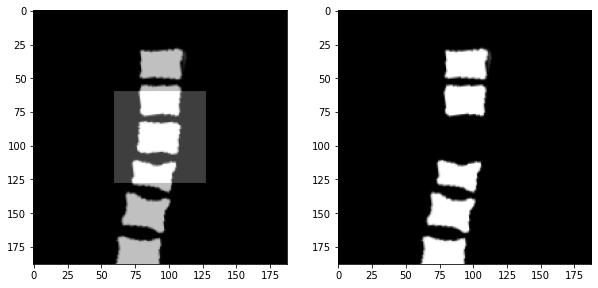

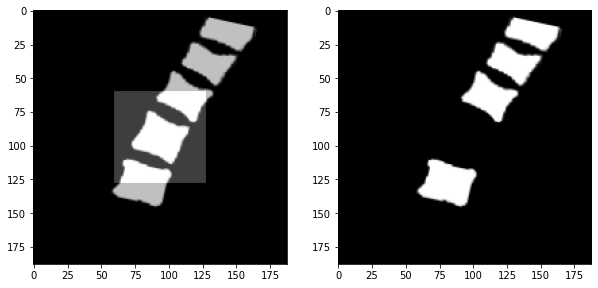

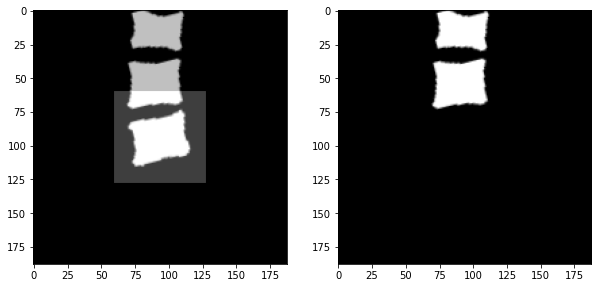

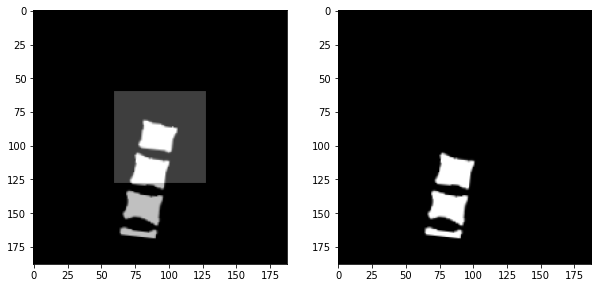

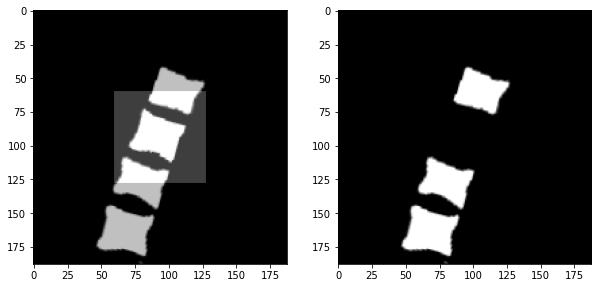

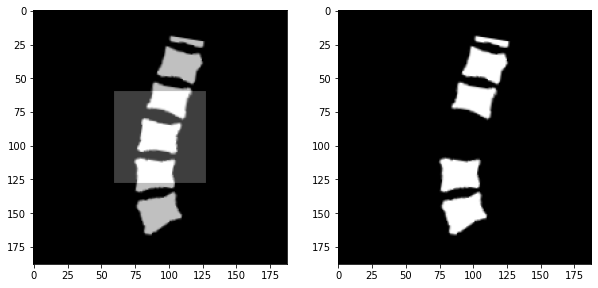

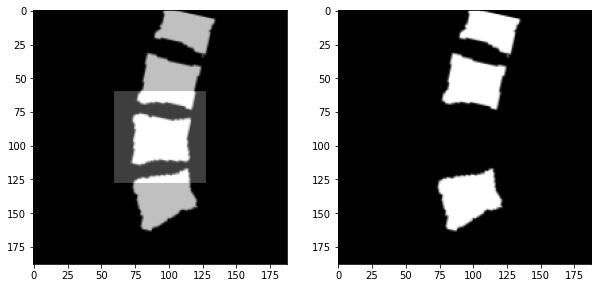

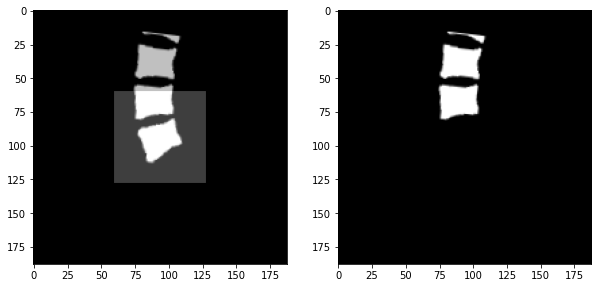

In [5]:
for i, m in train_loader:
    m, z = i.numpy()[0, 0], m.numpy()[0, 0]    
    
    pred_shape = (68, 68, 68)
    start = (patch_size[0] - pred_shape[0]) // 2
    end = start + pred_shape[0]
    
    p = torch.zeros(patch_size)
    p[start:end, start:end, start:end] = 1
    mid_slice = m.shape[0] // 2 
    plt.figure(figsize=(10, 8))
    plt.subplot(121)
    plt.imshow(m[mid_slice, :, :], cmap='gray')
    plt.imshow(p[mid_slice, :, :], alpha=0.25,cmap='gray')
    plt.subplot(122)
    plt.imshow(z[mid_slice, :, :], cmap='gray')

In [ ]:
dataset_free = Dataset(imgds, msks, patch_size=patch_size, free_form=True)
dataloader_free = DataLoader(dataset_free, batch_size=1)

In [ ]:
for i, m, z in dataloader_free:
    img, msk, z = i.numpy()[0], m.numpy()[0], z.numpy()[0]
    mid_slice = img.shape[0] // 2 
    
    write_image('files/img.mha', img)
    write_image('files/msk.mha', msk)
    write_image('files/z.mha', z)
    
    plt.figure(figsize=(10, 8))
    
    plt.subplot(121)
    plt_msk = np.ma.masked_where(msk == 0, msk)   
    plt_msk_z = np.ma.masked_where(z == 0, z)   
    plt.imshow(img[mid_slice, :, :], cmap='gray')
    plt.imshow(plt_msk_z[mid_slice, :, :], alpha=1, cmap='gray')    
    plt.imshow(plt_msk[mid_slice, :, :], alpha=1)   
    
    plt.subplot(122)
    plt.imshow(img[mid_slice, :, :], cmap='gray')

In [ ]:
for x, m, z in dataloader_free:
    # x is complete image
    # m is mask of the vert
    # z is mask of whats removed
    z = x * (1 - z)
    
    print(np.unique(x))
    mid_slice = x.shape[1] // 2 
    plt.figure(figsize=(10, 8))
    plt.imshow(x[0, mid_slice, :, :], cmap='gray')
    
    plt.figure(figsize=(10, 8))
    plt.imshow(z[0, mid_slice, :, :], cmap='gray')
    break